In [61]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from pandas import datetime
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-61-cf76c9a93183>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
data = pd.read_csv('MSFT.csv')

In [4]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d') 
data = data.set_index('Date')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8857 entries, 1986-03-13 to 2021-05-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8857 non-null   float64
 1   High       8857 non-null   float64
 2   Low        8857 non-null   float64
 3   Close      8857 non-null   float64
 4   Adj Close  8857 non-null   float64
 5   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 484.4 KB


###### check the null value

In [7]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##### check the oultliers

<AxesSubplot:>

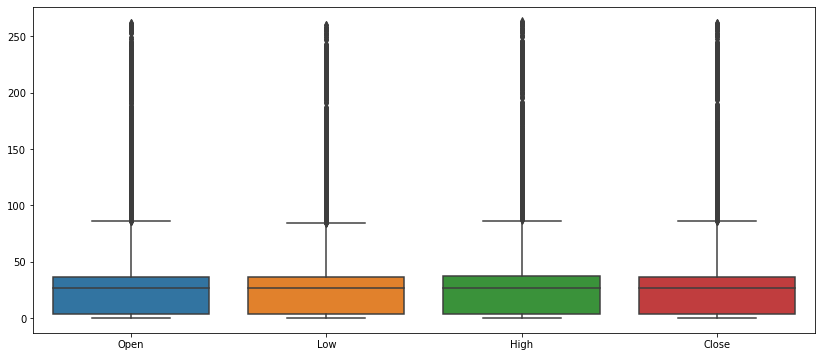

In [12]:
plt.figure(figsize=(14,6))
sns.boxplot(data=data[["Open","Low","High","Close"]])

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


<AxesSubplot:>

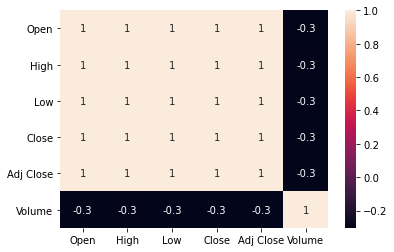

In [28]:
sns.heatmap(data.corr(),annot=True)

In [31]:
cor_matrix = data.corr()
cor_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999916,0.999911,0.999832,0.995506,-0.299034
High,0.999916,1.000000,0.999861,0.999904,0.995460,-0.296961
Low,0.999911,0.999861,1.000000,0.999915,0.995702,-0.301166
Close,0.999832,0.999904,0.999915,1.000000,0.995680,-0.299194
Adj Close,0.995506,0.995460,0.995702,0.995680,1.000000,-0.303573
Volume,-0.299034,-0.296961,-0.301166,-0.299194,-0.303573,1.000000


* we can see here that volume and other features are highly correlated but in negative i.e, if volume is low than other feature value will be decrease and vice-versa

###### data visualization

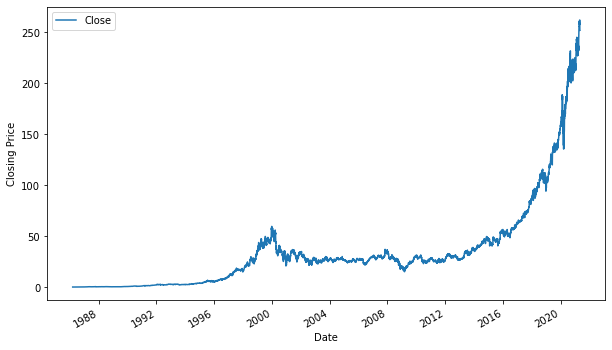

In [33]:
data_close = data['Close'] 
plt.figure(figsize=(10,6)) 
data_close.plot() 
plt.ylabel('Closing Price') 
plt.legend()

<Figure size 720x432 with 0 Axes>

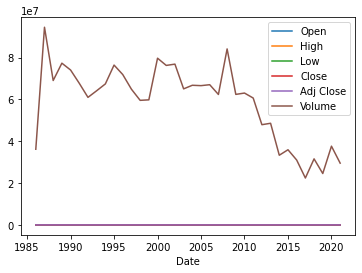

In [36]:
plt.figure(figsize=(10,6)) 
by_year = data.groupby(data.index.year).mean()
by_year.plot()
plt.show()

In [52]:
by_day = data.groupby(data.index.month)
by_day.mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1,36.061551,36.458805,35.654675,36.073881,30.996430,6.681154e+07
2,37.331741,37.738463,36.890530,37.320064,32.312538,6.334240e+07
3,36.394744,36.918991,35.933883,36.426735,31.551639,6.357152e+07
4,37.458487,37.847560,37.035518,37.468806,32.636283,6.191490e+07
5,31.866407,32.193879,31.545344,31.868772,26.999054,5.610649e+07
6,32.268523,32.631436,31.946693,32.311289,27.395077,5.654166e+07
7,33.874832,34.215881,33.489724,33.871470,28.799028,6.130505e+07
8,33.619823,33.954697,33.293310,33.646675,28.699553,5.273195e+07
9,33.749691,34.108658,33.363110,33.737405,28.879206,5.376141e+07


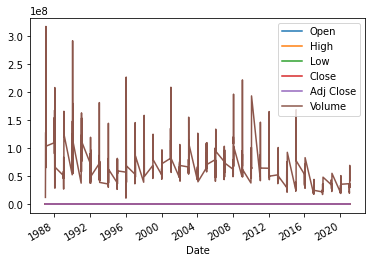

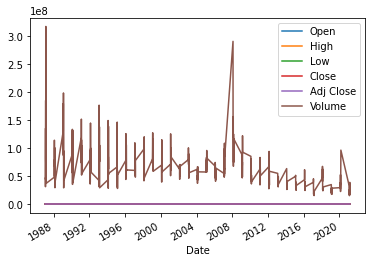

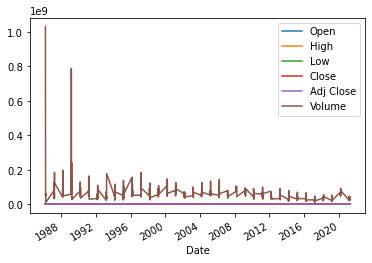

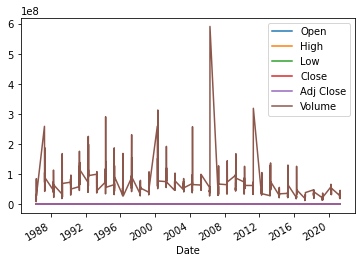

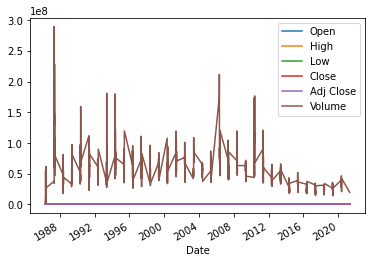

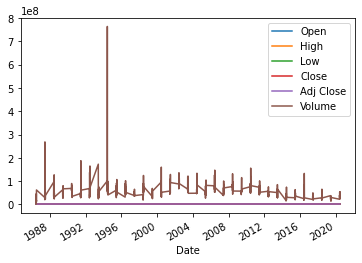

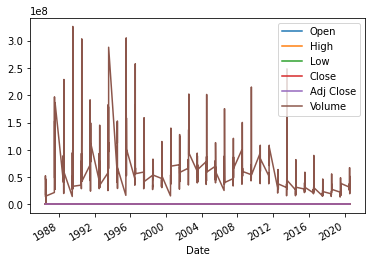

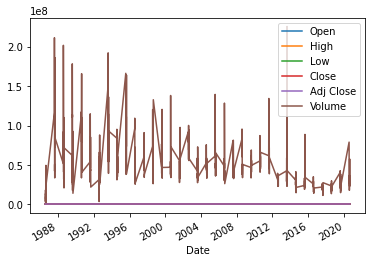

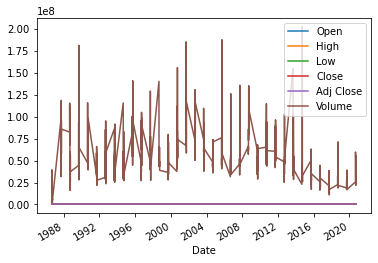

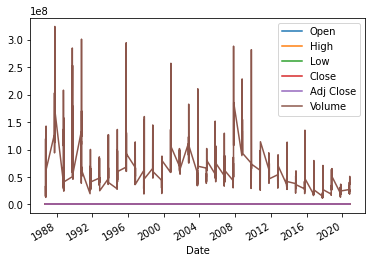

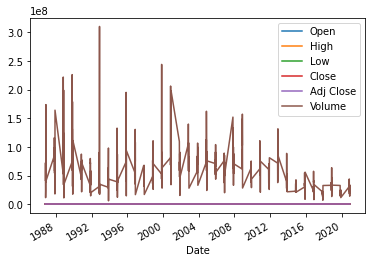

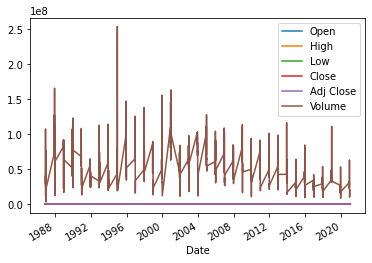

In [53]:
by_day = data.groupby(data.index.month)
by_day.plot()
plt.show()

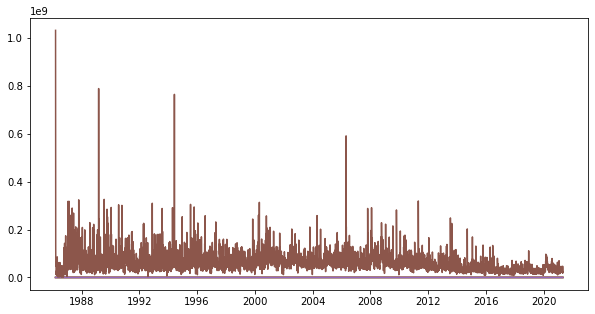

In [57]:
plt.figure(figsize=(10,5))
plt.plot(data)
plt.show()

###### This simple line plot shows us many important characteristics of our data. Here, you can observe that the closing price shows an uptrend with time.

* From the graph, we can say that the stock price shows a trend. We can not forecast the time series that shows a trend. This is because it does not possess the quality of being stationary. And to apply any statistical model to time series data, we must ensure that the data is stationary in nature.

##### lets check data is stationary or not!!!!

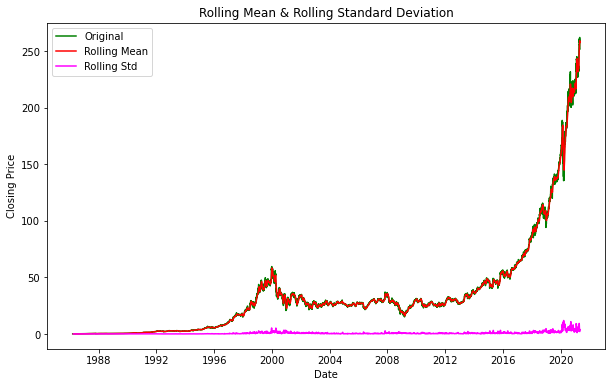

In [30]:
rolling_mean = data_close.rolling(window = 12).mean() 
rolling_std = data_close.rolling(window = 12).std() 
plt.figure(figsize=(10,6)) 
plt.plot(data['Close'], color = 'green', label = 'Original') 
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean') 
plt.plot(rolling_std, color = 'magenta', label = 'Rolling Std') 
plt.legend(loc = 'best') 
plt.title('Rolling Mean & Rolling Standard Deviation') 
plt.xlabel('Date') 
plt.ylabel('Closing Price') 
plt.legend()

* As the rolling mean and rolling standard deviation are not constant over time, we can conclude that the data is not stationary. 

###### Augmented Dickey-Fuller Test(ADF Test) 
* It is the most common statistical test to determine whether a time series is stationary or not. It works with taking a null hypothesis that tells that the series is not stationary. A minimal value of p(<0.005) is required to reject that null hypothesis. The test also considers the ADF statistics must be less than different critical values. In python, we can apply the ADF test using the Statsmodels library.

In [18]:
from statsmodels.tsa.stattools import adfuller 

adf_test = adfuller(data_close)
print('ADF Statistics: {}'.format(adf_test[0])) 
print('p-value: {}'.format(adf_test[1])) 
for key, value in adf_test[4].items(): 
    print('Critical Values Over {}: {}'.format(key, value))

ADF Statistics: 8.058600910403886
p-value: 1.0
Critical Values Over 1%: -3.431091633128763
Critical Values Over 5%: -2.8618677528979655
Critical Values Over 10%: -2.5669444578776335


* Here the p-value is much higher than the threshold(0.005) and the ADF statistic is also significantly higher than the critical values. So, we can not reject the null hypothesis and must conclude that the time series is not stationary.

* Our time series is not stationary which means we can not fit any statistical models to it and forecast the future.

In [23]:
def check_stationarity(timeseries): 
    # rolling statistics 
    rolling_mean = data_close.rolling(window = 365).mean() 
    rolling_std = data_close.rolling(window = 365).std() 

    #rolling statistics plot 
    plt.figure(figsize=(10,6)) 
    plt.plot(timeseries, color = 'green', label = 'Original') 
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean') 
    plt.plot(rolling_std, color = 'magenta', label = 'Rolling Std') 
    plt.legend(loc = 'best') 
    plt.title('Rolling Mean & Rolling Standard Deviation') 
    plt.xlabel('Date') 
    plt.ylabel('Closing Price') 
    plt.legend()

    # Augmented Dickey–Fuller test: 
    adf_test = adfuller(timeseries) 
    print('ADF Statistic: {}'.format(adf_test[0])) 
    print('p-value: {}'.format(adf_test [1])) 
    print('Critical Values:') 
    for key, value in adf_test[4].items(): 
        print('Critical Values Over {}: {}'.format(key, value))

To make a non-stationary time series into stationary time series, we need to perform various transformations of the data and check the stationarity every time with rolling statistics and ADF test. If any transformation could satisfy the tests, we can reject the null hypothesis and conclude that the series now has become stationary. Here are some examples of transformation we can apply to make our data stationary. Let's check that

###### Log Transformation

ADF Statistic: -2.869064329676685
p-value: 0.04906547474769915
Critical Values:
Critical Values Over 1%: -3.4310889513452714
Critical Values Over 5%: -2.861866567874037
Critical Values Over 10%: -2.5669438270819493


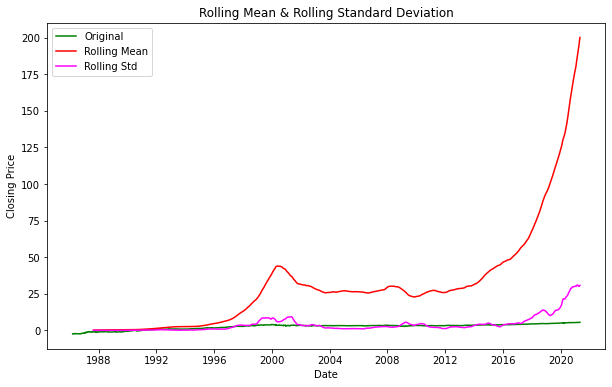

In [24]:
data_log = np.log(data['Close']) 
check_stationarity(data_log) 

* From both the test we can see that the p-value can not satisfy to reject the null hypothesis and the ADF statistics is higher than the critical values. So, log transformation won't help us to make the time series stationary.

Subtracting Rolling Mean to the Log Values 
* To make the series stationary we can subtract the rolling mean from the log values. Let's check what happens-

ADF Statistic: -4.698398739441622
p-value: 8.4737571029672e-05
Critical Values:
Critical Values Over 1%: -3.4311207410099285
Critical Values Over 5%: -2.8618806149919322
Critical Values Over 10%: -2.5669513044629184


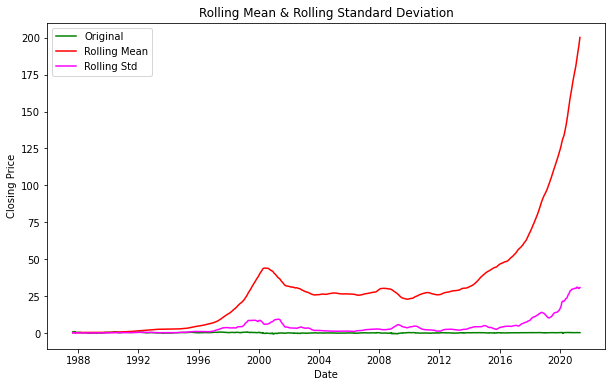

In [25]:
rolling_mean = data_log.rolling(window=365).mean() 
df_log_minus_mean = data_log - rolling_mean 
df_log_minus_mean.dropna(inplace=True) 
check_stationarity(df_log_minus_mean) 

* Here the ADF statistic is less than the critical values. But the rolling mean and rolling standard deviation are not constant and still, the p-value is higher than the threshold. So, we can not reject the null hypothesis yet and conclude it as a stationary series.

##### Subtracting Exponential Decay from the Log Values 
* Subtracting exponential decay can help to make the series stationary.

ADF Statistic: -2.5698910144386415
p-value: 0.09938121285787549
Critical Values:
Critical Values Over 1%: -3.4310889513452714
Critical Values Over 5%: -2.861866567874037
Critical Values Over 10%: -2.5669438270819493


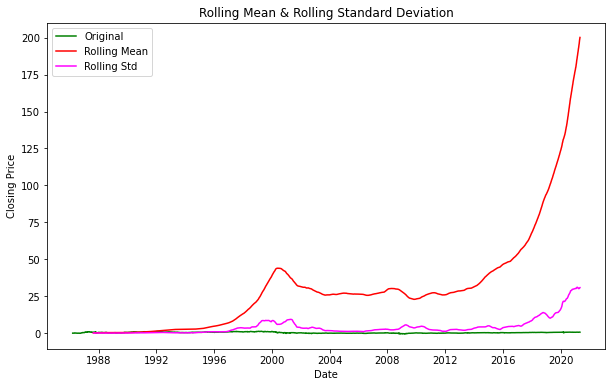

In [26]:
mean_exp_decay = data_log.ewm(halflife=365, min_periods=0, adjust=True).mean() 
df_log_exp_decay = data_log - mean_exp_decay 
df_log_exp_decay.dropna(inplace=True) 
check_stationarity(df_log_exp_decay) 

Still the rolling mean and standard deviation have not become constant and the p-value is still higher. So, the series has yet not become a stationary series.

ADF Statistic: -50.44653170374854
p-value: 0.0
Critical Values:
Critical Values Over 1%: -3.4310889513452714
Critical Values Over 5%: -2.861866567874037
Critical Values Over 10%: -2.5669438270819493


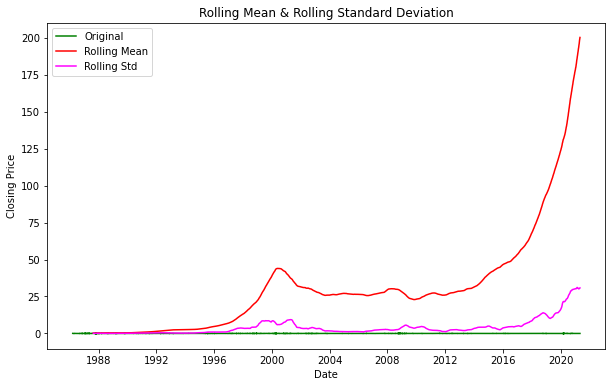

In [27]:
df_log_shift = data_log - data_log.shift() 
df_log_shift.dropna(inplace=True) 
check_stationarity(df_log_shift) 

The rolling mean and standard deviation now become quite consistent, the ADF statistic is lower than the critical values and the p-value is lower than the threshold. Excellent! The time series have converged to stationary and now we can apply statistical models to it.